/var/folders/lx/1fqb9z1x3x53xmjzc_rc95m00000gp/T/ipykernel_87321/938517649.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())



Cross-Validation Scores: [0.61403509 0.57894737 0.63157895 0.63157895 0.63157895 0.63157895
 0.63157895 0.59649123 0.63157895 0.625     ]

Average Cross-Validation Score: 0.6203947368421053

Accuracy: 0.6374269005847953

Confusion Matrix:
 [[107   1]
 [ 61   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.99      0.78       108
           1       0.67      0.03      0.06        63

    accuracy                           0.64       171
   macro avg       0.65      0.51      0.42       171
weighted avg       0.65      0.64      0.51       171


AUC-ROC: 0.9409171075837742

F1 Score: 0.5120310658068093

Recall: 0.6374269005847953

Precision: 0.6478696741854636

Balanced Accuracy: 0.5112433862433863

Matthews Correlation Coefficient: 0.08262167783197227


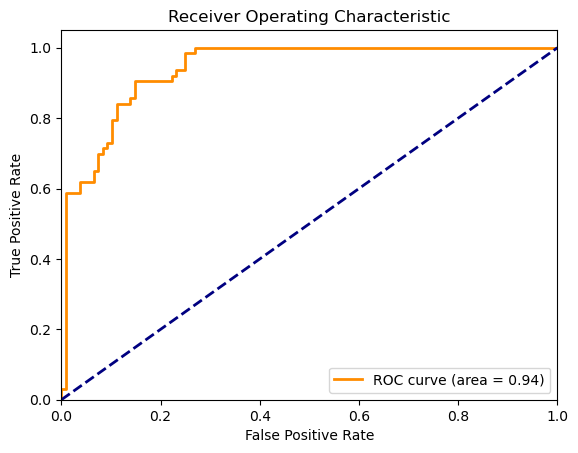

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score,
                             recall_score, precision_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc,roc_curve, auc, plot_confusion_matrix)
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv("/Users/alyssajames/BMEN415/Classification Models/breast-cancer.csv")

# Fill missing values with the mean of the respective column
data = data.fillna(data.mean())

# Define the features and target variables
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Encoding the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Add k-fold cross-validation
k = 10
cv_scores = cross_val_score(classifier, X, y, cv=k)

# Train the classifier using the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Get predicted probabilities for the positive class
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print the results
print("\nCross-Validation Scores:", cv_scores)
print("\nAverage Cross-Validation Score:", cv_scores.mean())
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAUC-ROC:", auc_roc)
print("\nF1 Score:", f1)
print("\nRecall:", recall)
print("\nPrecision:", precision)
print("\nBalanced Accuracy:", balanced_accuracy)

# Compute the false positive rate, true positive rate, and thresholds using the roc_curve function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve (AUC) using the auc function
roc_auc = auc(fpr, tpr)

# Plot the ROC curve using matplotlib
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()